In [257]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [259]:
# Load processed CSV file

processed_file_path = '../data/processed/'
processed_file_name = 'wastewater_tank1_processed.csv'

fig_file_path = '../figures/'

df = pd.read_csv(processed_file_path + processed_file_name, index_col = 0, parse_dates=True)

In [261]:
cols_to_keep = ['N2O', 'NH4', 'NO3']

In [263]:
any_nan = df[df[cols_to_keep].isna().any(axis = 1)][cols_to_keep]
all_nan = df[df[cols_to_keep].isna().all(axis = 1)][cols_to_keep]

print("cols with any missing values: ", any_nan.shape[0])
print("cols with all missing values: ", all_nan.shape[0])

cols with any missing values:  1018
cols with all missing values:  1018


In [265]:
any_nan_row_inds = any_nan.index.to_list()

(array([  6.,   0.,   0.,   0.,  64.,   0.,  53.,   0.,   0.,   0.,   0.,
          0.,   0.,  15.,   0.,   0., 143., 252.,   0.,   9.,   0.,   0.,
          0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 450.,   0.,   0.,
          0.,   0.,   0.,   5.,   3.,   9.]),
 array([19222.35416667, 19235.25180556, 19248.14944444, 19261.04708333,
        19273.94472222, 19286.84236111, 19299.74      , 19312.63763889,
        19325.53527778, 19338.43291667, 19351.33055556, 19364.22819444,
        19377.12583333, 19390.02347222, 19402.92111111, 19415.81875   ,
        19428.71638889, 19441.61402778, 19454.51166667, 19467.40930556,
        19480.30694444, 19493.20458333, 19506.10222222, 19518.99986111,
        19531.8975    , 19544.79513889, 19557.69277778, 19570.59041667,
        19583.48805556, 19596.38569444, 19609.28333333, 19622.18097222,
        19635.07861111, 19647.97625   , 19660.87388889, 19673.77152778,
        19

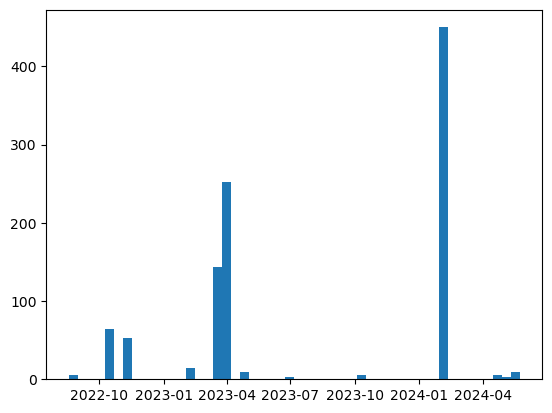

In [267]:
plt.hist(any_nan_row_inds, bins = 50)

In [269]:
df = df[cols_to_keep]

In [273]:
df.head()

,N2O,NH4,NO3
time,,,
2022-06-11 23:00:00,0.646991,1.480606,0.061391
2022-06-11 23:10:00,0.578038,1.619492,0.018822
2022-06-11 23:20:00,0.509606,2.186933,0.005908
2022-06-11 23:30:00,0.470197,2.274744,0.123406
2022-06-11 23:40:00,0.493895,2.413906,0.482552


In [277]:
processed_file_path = '../data/processed/'

tenth_df = len(df) // 10

def create_lagged_dps(df, cols_to_lag = ('N2O', 'NH4', 'NO3'), lag_by = 20, target = 'N2O', target_lead_by = 2):
    """
    Adds lag and lead columns to a given df.
    
    Args:
        df (DataFrame): The DataFrame within which to lag features
        cols_to_lag (tuple of strings): Tuple containing the name of the columns in df to be lagged.
        lag_by (int): The number of lags to create, from lag 1 upto `lag_by`.
        target (string): Target variable column, to lead forward.
        target_lead_by (int): How many values to lead the target forward by.
    
    Returns:
        df (DataFrame): DataFrame with lagged columns.
    """

    # Lag each `col` in `cols_to_lag` by upto `lag_by` values into the past.
    
    for col in cols_to_lag:
        for lag in range(1, lag_by + 1):
            
            lagged_col_name = f"{col}_lag{lag}"

            df[lagged_col_name] = df[col].shift(lag)

    # Lead `target` column forwards by upto `target_lead_by` values.

    for lead in range(1, target_lead_by + 1):
        lead_col_name = f"{target}_lead{lead}"
        
        df[lead_col_name] = df[target].shift(-lead)

    return df



for i in range(9):
    
    df_split = df[i*tenth_df:(i + 1)*tenth_df].copy()

    df_split = create_lagged_dps(df_split)

    df_split = df_split.dropna(how = 'any')

    split_file_name = f'wastewater_tank1_processed_split_{i + 1}.csv'
    
    df_split.to_csv(processed_file_path + split_file_name, index = True)


df_split_test = df[9*tenth_df:].copy()

df_split_test = create_lagged_dps(df_split_test)

df_split_test = df_split_test.dropna(how = 'any')

split_test_file_name = f'wastewater_tank1_processed_test.csv'
    
df_split_test.to_csv(processed_file_path + split_test_file_name, index = True)
